<a href="https://colab.research.google.com/github/RaghunathSai/Applied-Data-Science-Capstone/blob/master/Battle_of_Neighbourhoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
#!pip install geocoder
import geocoder
import os
#!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [0]:
CLIENT_ID = 'HSV4U5PIMX4QAP3DM0YC3XWZWXHFAQBBVBWMENEV5Q3MQ1P4' # your Foursquare ID
CLIENT_SECRET = 'UYWW4G5ETWIM0UTUGP0YO50EQHVPSC0VBHCZVJVOMUHB3TAK' # your Foursquare Secret

In [0]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    
    VERSION = '20200401' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [0]:
def get_venue_details(venue_id):
        
    
    VERSION = '20200401' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [32]:
df = pd.read_csv('toronto.csv',sep=';',header=None)
df.columns=["Postalcode","Borough","Neighborhood"]
indexNames = df[ df['Borough'] =='Not assigned'].index
df.drop(indexNames , inplace=True)
df.loc[df['Neighborhood'] =='Not assigned' , 'Neighborhood'] = df['Borough']
result = df.groupby(['Postalcode','Borough'], sort=False).agg( ', '.join)
df_new=result.reset_index()
df_new.head(15)

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [33]:
df_lon_lat = pd.read_csv('Geospatial_Coordinates.csv')
df_lon_lat.columns=['Postalcode','Latitude','Longitude']
Toronto_df = pd.merge(df_new,
                 df_lon_lat[['Postalcode','Latitude', 'Longitude']],
                 on='Postalcode')
Toronto_df.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [34]:
Toronto_data=Toronto_df[['Borough','Neighborhood','Latitude','Longitude']]
Toronto_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [35]:
Toronto_data.shape

(103, 4)

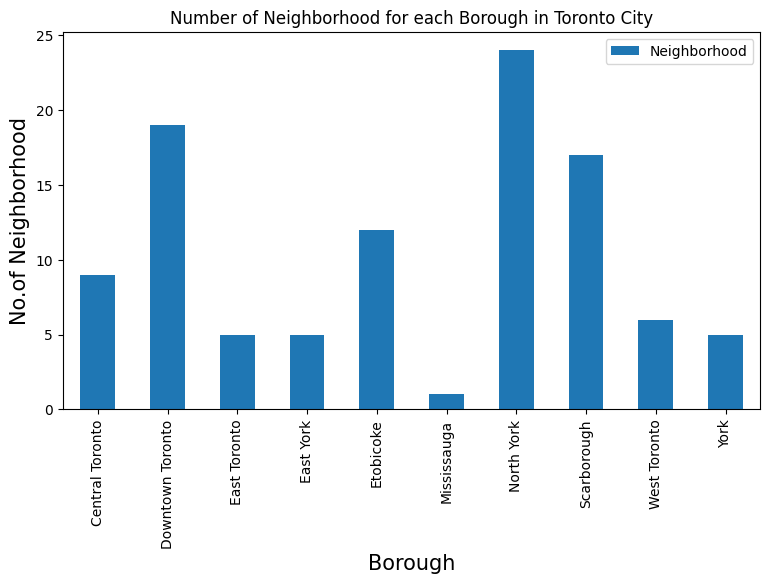

In [36]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
Toronto_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [38]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_tor=pd.DataFrame(columns=column_names)
count=1
for row in Toronto_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(Toronto_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_tor = indian_rest_tor.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Indian Resturants in Parkwoods, North York:0
( 2 / 103 ) Indian Resturants in Victoria Village, North York:0
( 3 / 103 ) Indian Resturants in Regent Park, Harbourfront, Downtown Toronto:2
( 4 / 103 ) Indian Resturants in Lawrence Manor, Lawrence Heights, North York:0
( 5 / 103 ) Indian Resturants in Queen's Park, Ontario Provincial Government, Downtown Toronto:1
( 6 / 103 ) Indian Resturants in Islington Avenue, Humber Valley Village, Etobicoke:0
( 7 / 103 ) Indian Resturants in Malvern, Rouge, Scarborough:0
( 8 / 103 ) Indian Resturants in Don Mills, North York:0
( 9 / 103 ) Indian Resturants in Parkview Hill, Woodbine Gardens, East York:0
( 10 / 103 ) Indian Resturants in Garden District, Ryerson, Downtown Toronto:0
( 11 / 103 ) Indian Resturants in Glencairn, North York:0
( 12 / 103 ) Indian Resturants in West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale, Etobicoke:0
( 13 / 103 ) Indian Resturants in Rouge Hill, Port Union, Highland Creek, Scarboroug

In [39]:
indian_rest_tor.head()

,Borough,Neighborhood,ID,Name
0,Downtown Toronto,"Regent Park, Harbourfront",4af9a379f964a520c91222e3,Bombay Palace
1,Downtown Toronto,"Regent Park, Harbourfront",52af6dc5498e33995b0bbf03,Sultan Of Samosas
2,Downtown Toronto,"Queen's Park, Ontario Provincial Government",4bedf8b5e24d20a17b567214,Kothur Indian Cuisine
3,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro
4,Scarborough,Woburn,4c632edeedd320a19ad5ae29,Bombay Palace


In [40]:
indian_rest_tor.shape

(46, 4)

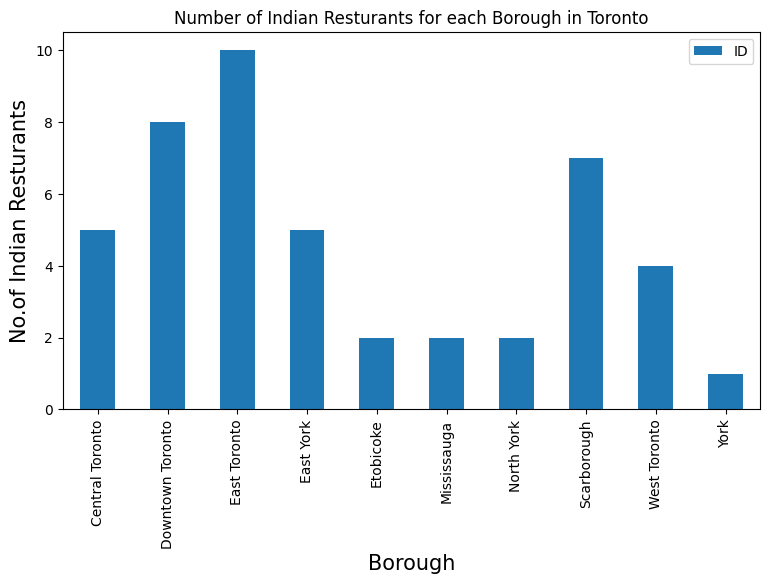

In [41]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_tor.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

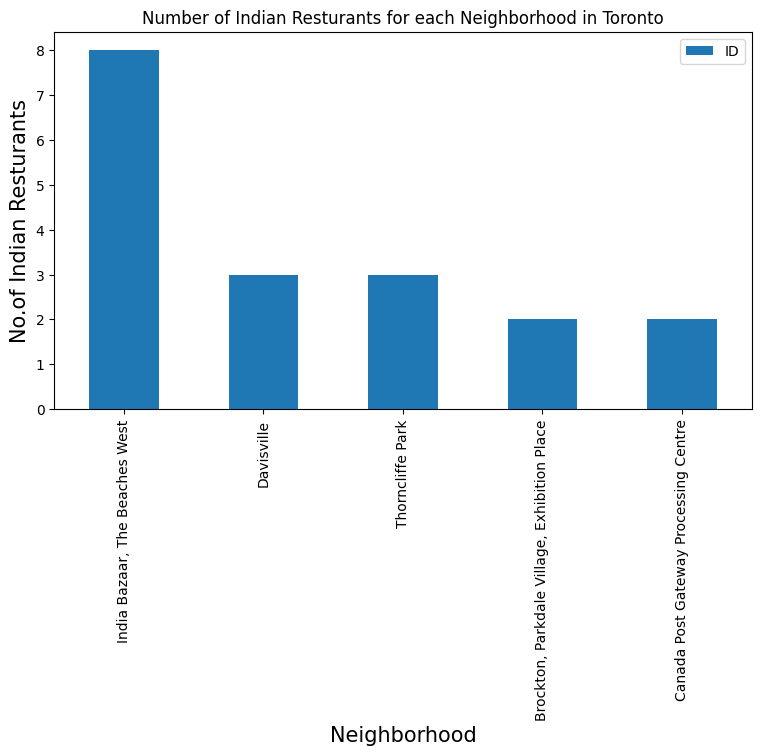

In [42]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in Toronto')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_tor.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [61]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_tor=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_tor.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_tor),')','processed')
    indian_rest_stats_tor = indian_rest_stats_tor.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

KeyError: ignored

In [58]:
indian_rest_stats_tor.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips


In [0]:
indian_rest_stats_tor.to_csv('indian_rest_stats_tor.csv', index=False)

In [0]:
indian_rest_stats_tor_csv=pd.read_csv('indian_rest_stats_tor.csv')

In [23]:
indian_rest_stats_tor_csv.shape

(0, 7)

In [24]:
indian_rest_stats_tor_csv.head()


,Borough,Neighborhood,ID,Name,Likes,Rating,Tips


In [43]:
indian_rest_stats_tor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       46 non-null     object 
 1   Neighborhood  46 non-null     object 
 2   ID            46 non-null     object 
 3   Name          46 non-null     object 
 4   Likes         46 non-null     object 
 5   Rating        46 non-null     float64
 6   Tips          46 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.6+ KB


In [0]:
indian_rest_stats_tor['Likes']=indian_rest_stats_tor['Likes'].astype('float64')
indian_rest_stats_tor['Tips']=indian_rest_stats_tor['Tips'].astype('float64')

In [45]:
indian_rest_stats_tor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       46 non-null     object 
 1   Neighborhood  46 non-null     object 
 2   ID            46 non-null     object 
 3   Name          46 non-null     object 
 4   Likes         46 non-null     float64
 5   Rating        46 non-null     float64
 6   Tips          46 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


In [46]:
indian_rest_stats_tor.iloc[indian_rest_stats_tor['Likes'].idxmax()]

Borough                 Downtown Toronto
Neighborhood                    Christie
ID              4adb969ef964a520332921e3
Name              Banjara Indian Cuisine
Likes                                142
Rating                               8.8
Tips                                  75
Name: 6, dtype: object

In [47]:
indian_rest_stats_tor.iloc[indian_rest_stats_tor['Rating'].idxmax()]

Borough                 Downtown Toronto
Neighborhood                    Christie
ID              4adb969ef964a520332921e3
Name              Banjara Indian Cuisine
Likes                                142
Rating                               8.8
Tips                                  75
Name: 6, dtype: object

In [48]:
# Resturant with maximum Tips
indian_rest_stats_tor.iloc[indian_rest_stats_tor['Tips'].idxmax()]

Borough                 Downtown Toronto
Neighborhood                    Christie
ID              4adb969ef964a520332921e3
Name              Banjara Indian Cuisine
Likes                                142
Rating                               8.8
Tips                                  75
Name: 6, dtype: object

In [0]:
tor_neighborhood_stats=indian_rest_stats_tor.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
tor_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [50]:
tor_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
19,"St. James Town, Cabbagetown",8.40
5,Christie,8.35
11,"High Park, The Junction South",8.30
20,"The Annex, North Midtown, Yorkville",8.15
6,Church and Wellesley,8.10
15,"Queen's Park, Ontario Provincial Government",8.10
25,"Wexford, Maryvale",8.00
2,"Brockton, Parkdale Village, Exhibition Place",7.85
1,"Bedford Park, Lawrence Manor East",7.40
4,Cedarbrae,7.40


In [0]:
tor_borough_stats=indian_rest_stats_tor.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
tor_borough_stats.columns=['Borough','Average Rating']

In [52]:
tor_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Downtown Toronto,7.80
8,West Toronto,7.75
0,Central Toronto,7.66
4,Etobicoke,7.05
6,North York,6.75


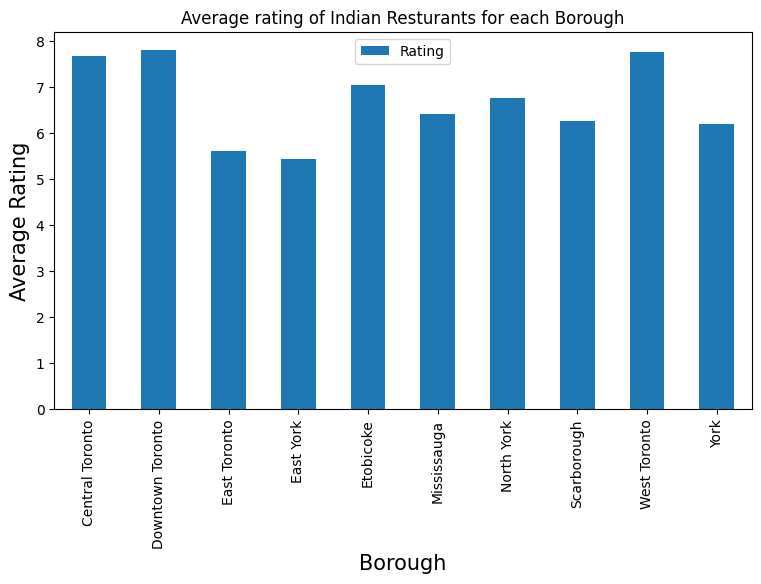

In [53]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_tor.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [0]:
tor_neighborhood_stats=tor_neighborhood_stats[tor_neighborhood_stats['Average Rating']>=8.0]

In [55]:
tor_neighborhood_stats

,Neighborhood,Average Rating


In [0]:
tor_neighborhood_stats=pd.merge(tor_neighborhood_stats,Toronto_data, on='Neighborhood')

In [0]:
tor_neighborhood_stats=tor_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [58]:
tor_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating


In [0]:
tor_map = folium.Map(location=geo_location('Toronto'), zoom_start=12)

In [0]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the neighborhood and add each to the feature group
for lat, lng, in tor_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [0]:
tor_neighborhood_stats['Label']=tor_neighborhood_stats['Neighborhood']+', '+tor_neighborhood_stats['Borough']+'('+tor_neighborhood_stats['Average Rating'].map(str)+')'


In [62]:
# add pop-up text to each marker on the map
for lat, lng, label in tor_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(tor_map)        
# add incidents to map
tor_map.add_child(incidents)